<a href="https://colab.research.google.com/github/Niktain-america/Project-Portfolio/blob/main/Working_with_geospatial_vector_data_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
     |████████████████████████████████| 16.6 MB 157 kB/s 
     |████████████████████████████████| 7.8 MB 39.5 MB/s 


In [ ]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.DataFrame({'city':     ['London', 'Manchester', 'Birmingham', 'Leeds', 'Glasgow'],
                   'population': [9787426, 2553379,  2440986,  1777934,  1209143],
                   'area':       [1737.9,  630.3,    598.9,    487.8,    368.5],
                  'latitude':   [51.50853,53.48095, 52.48142, 53.79648,  55.86515],
                   'longitude':  [-0.12574, -2.23743, -1.89983, -1.54785,  -4.25763]})

df.head()

,city,population,area,latitude,longitude
0,London,9787426,1737.9,51.50853,-0.12574
1,Manchester,2553379,630.3,53.48095,-2.23743
2,Birmingham,2440986,598.9,52.48142,-1.89983
3,Leeds,1777934,487.8,53.79648,-1.54785
4,Glasgow,1209143,368.5,55.86515,-4.25763


In [ ]:
df['point']=list(zip(df.longitude, df.latitude))
df['geometry']=df['point'].apply(Point)
df.head()

,city,population,area,latitude,longitude,point,geometry
0,London,9787426,1737.9,51.50853,-0.12574,"(-0.12574, 51.50853)",POINT (-0.12574 51.50853)
1,Manchester,2553379,630.3,53.48095,-2.23743,"(-2.23743, 53.48095)",POINT (-2.23743 53.48095)
2,Birmingham,2440986,598.9,52.48142,-1.89983,"(-1.89983, 52.48142)",POINT (-1.89983 52.48142)
3,Leeds,1777934,487.8,53.79648,-1.54785,"(-1.54785, 53.79648)",POINT (-1.54785 53.79648)
4,Glasgow,1209143,368.5,55.86515,-4.25763,"(-4.25763, 55.86515)",POINT (-4.25763 55.86515)


In [ ]:
df = df.drop('point',1)
cities=gpd.GeoDataFrame(df, geometry='geometry')
cities.head()

<ipython-input-7-f35bbb770834>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('point',1)


,city,population,area,latitude,longitude,geometry
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853)
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095)
2,Birmingham,2440986,598.9,52.48142,-1.89983,POINT (-1.89983 52.48142)
3,Leeds,1777934,487.8,53.79648,-1.54785,POINT (-1.54785 53.79648)
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515)


In [ ]:
cities['population'].mean()

3553773.6

In [ ]:
cities['area'].min()

368.5

In [ ]:
cities['density']=cities['population']/cities['area']
cities

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
2,Birmingham,2440986,598.9,52.48142,-1.89983,POINT (-1.89983 52.48142),4075.782267
3,Leeds,1777934,487.8,53.79648,-1.54785,POINT (-1.54785 53.79648),3644.801148
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


In [ ]:
cities.area

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [ ]:
cities.total_bounds

array([-4.25763, 51.50853, -0.12574, 55.86515])

In [ ]:
cities.geom_type

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [ ]:
cities.distance(cities.geometry[0])

0    0.000000
1    2.889580
2    2.023341
3    2.693903
4    6.004386
dtype: float64

In [ ]:
cities2=cities.copy()
cities2=cities2.drop([2,3])
cities2.head()

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


In [ ]:
cities2.area

0    0.0
1    0.0
4    0.0
dtype: float64

In [ ]:
cities2.bounds

,minx,miny,maxx,maxy
0,-0.12574,51.50853,-0.12574,51.50853
1,-2.23743,53.48095,-2.23743,53.48095
4,-4.25763,55.86515,-4.25763,55.86515


In [ ]:
cities2.geom_type

0    Point
1    Point
4    Point
dtype: object

In [ ]:
cities2.centroid

0    POINT (-0.12574 51.50853)
1    POINT (-2.23743 53.48095)
4    POINT (-4.25763 55.86515)
dtype: geometry

In [ ]:
cities.representative_point()

0    POINT (-0.12574 51.50853)
1    POINT (-2.23743 53.48095)
2    POINT (-1.89983 52.48142)
3    POINT (-1.54785 53.79648)
4    POINT (-4.25763 55.86515)
dtype: geometry

In [ ]:
lon_point = cities.loc[cities['city'] == 'London', 'geometry'].squeeze()
man_point = cities.loc[cities['city'] == 'Manchester', 'geometry'].squeeze()
birm_point = cities.loc[cities['city'] == 'Birmingham', 'geometry'].squeeze()
leeds_point = cities.loc[cities['city'] == 'Leeds', 'geometry'].squeeze()

In [ ]:
lon_man_line = gpd.GeoSeries(LineString([lon_point, man_point]))
man_birm_line = gpd.GeoSeries(LineString([man_point, birm_point]))
birm_lon_line = gpd.GeoSeries(LineString([birm_point,lon_point]))
leeds_man_line = gpd.GeoSeries(LineString([leeds_point, man_point]))
birm_leeds_line = gpd.GeoSeries(LineString([birm_point,leeds_point]))

In [ ]:
Polygon([[lon_point.x,lon_point.y],[man_point.x,man_point.y],[lon_point.x,lon_point.y]])
lon_man_birm_polygon = gpd.GeoSeries(Polygon([[lon_point.x,lon_point.y],[man_point.x,man_point.y],[birm_point.x,birm_point.y],[lon_point.x,lon_point.y]]))
leeds_man_birm_polygon = gpd.GeoSeries(Polygon([[leeds_point.x,leeds_point.y],[man_point.x,man_point.y],[birm_point.x,birm_point.y]]))

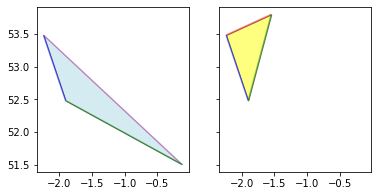

In [ ]:
fig, (poly1,poly2) = plt.subplots(ncols=2, sharex=True, sharey=True)

lon_man_birm_polygon.plot(ax=poly1, color='lightblue', edgecolor='black',alpha=0.5);
lon_man_line.plot(ax=poly1,color='violet',alpha=0.5);
man_birm_line.plot(ax=poly1,color='blue',alpha=0.5);
birm_lon_line.plot(ax=poly1,color='green',alpha=0.5);

leeds_man_birm_polygon.plot(ax=poly2, color='yellow', edgecolor='black',alpha=0.5);
leeds_man_line.plot(ax=poly2,color='red',alpha=0.5);
man_birm_line.plot(ax=poly2,color='blue',alpha=0.5);
birm_leeds_line.plot(ax=poly2,color='green',alpha=0.5);


In [ ]:
poly1 = gpd.GeoDataFrame({'geometry': lon_man_birm_polygon})
poly2 = gpd.GeoDataFrame({'geometry': leeds_man_birm_polygon})

gpd.overlay( poly1, poly2, how='union').plot(color='red',alpha=0.5);


ImportError: ignored

In [ ]:
cities1 = cities[0:1].copy()
cities1.head()


,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416


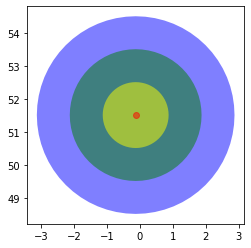

In [ ]:
base = cities1.buffer(3).plot(color='blue',alpha=0.5);
cities1.buffer(2).plot(ax=base,color='green',alpha=0.5);
cities1.buffer(1).plot(ax=base,color='yellow',alpha=0.5);
cities1.plot(ax=base,color='red',alpha=0.5);


In [ ]:
cities.head()

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
2,Birmingham,2440986,598.9,52.48142,-1.89983,POINT (-1.89983 52.48142),4075.782267
3,Leeds,1777934,487.8,53.79648,-1.54785,POINT (-1.54785 53.79648),3644.801148
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


In [ ]:
cities2.head()

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


In [ ]:
cities.contains(cities2)

/usr/local/lib/python3.8/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0     True
1     True
2    False
3    False
4     True
dtype: bool

In [ ]:
cities2.contains(lon_point)

0     True
1    False
4    False
dtype: bool

In [ ]:
cities2[cities2.contains(lon_point)]

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416


In [ ]:
cities2[cities2.contains(man_point)]

,city,population,area,latitude,longitude,geometry,density
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467


In [ ]:
cities[cities.within(cities2)]

/usr/local/lib/python3.8/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


In [ ]:
cities2.intersects(lon_man_line)

/usr/local/lib/python3.8/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0     True
1    False
4    False
dtype: bool

In [ ]:

cities2[cities2.crosses(man_birm_line)]

,city,population,area,latitude,longitude,geometry,density


In [ ]:

cities2[cities2.disjoint(lon_point)]


,city,population,area,latitude,longitude,geometry,density
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445
